# Predicting heart disease using machine learning

this notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a ,machine learning model capable of predicting whether or not someone has hearrt disease or not based on their medical attributes

- id (Unique id for each patient)
- age (Age of the patient in years)
- origin (place of study)
- sex (Male/Female)
- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl)
- restecg (resting electrocardiographic results)
-  Values: [normal, stt abnormality, lv hypertrophy]
- thalach: maximum heart rate achieved
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to res
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]
- num: the predicted attribute

In [45]:
!pip install pandoc

/Users/swayamsingal/.zshenv:.:1: no such file or directory: /Users/swayamsingal/.cargo/env
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 248.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 257.8 kB/s eta 0:00:00a 0:00:01
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34799 sha256=caed28b38968419eb8d427a044cd8bbfc1159b018bd3e9c274313516d34df4c9
  Stored in directory: /Users/swayamsingal/Library/Caches/pip/wheels/4f/d7/32/c6c9b7b05e852e920fd72174487be3a0f18e633a7adcc303be
Successfully built pandoc


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.drop('dataset',axis=1)
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [6]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [7]:
x=df.drop("num",axis=1)
y=df["num"]

In [8]:
x.shape

(920, 15)

In [9]:
categorical_features = ['sex','cp','restecg','slope','thal']
numeric_features = ['thalch','trestbps','chol','oldpeak','ca']

categorical_transformer = Pipeline(steps = [
    ('imputer' , SimpleImputer(strategy = "constant" , fill_value="missing")),
    ("onehotencoded" , OneHotEncoder(handle_unknown="ignore"))])

numeric_transformer = Pipeline(steps = [
    ('imputer' , SimpleImputer(strategy = "mean" ))])

preprocessed = ColumnTransformer([
                ("cat" , categorical_transformer , categorical_features),
                ("num" , numeric_transformer , numeric_features)])

filled_x = preprocessed.fit_transform(x)
%matplotlib inline

In [10]:
filled_x = pd.DataFrame(filled_x)
filled_x

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,150.000000,145.000000,233.0,2.300000,0.000000
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,108.000000,160.000000,286.0,1.500000,3.000000
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,129.000000,120.000000,229.0,2.600000,2.000000
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,187.000000,130.000000,250.0,3.500000,0.000000
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,172.000000,130.000000,204.0,1.400000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,154.000000,127.000000,333.0,0.000000,0.676375
916,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,137.545665,132.132404,139.0,0.878788,0.676375
917,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,100.000000,122.000000,223.0,0.000000,0.676375
918,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,137.545665,132.132404,385.0,0.878788,0.676375


In [11]:
y=np.array(y)
y[y>0]=1
y=pd.DataFrame(y)
y

,0
0,0
1,1
2,1
3,0
4,0
...,...
915,1
916,0
917,1
918,0


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
scaled_x = scaler.fit_transform(filled_x)

In [13]:
scaled_x

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,-0.516931,0.516931,-1.081578,-0.482953,-0.533775,4.358899,1.973225,-0.046676,-1.221976,-0.491493,...,-0.532094,4.358899,-1.058213,-0.520306,-0.513553,4.956983e-01,6.980410e-01,0.311021,1.349421e+00,-1.249371e+00
1,-0.516931,0.516931,0.924575,-0.482953,-0.533775,-0.229416,1.973225,-0.046676,-1.221976,-0.491493,...,-0.532094,-0.229416,-1.058213,1.921946,-0.513553,-1.175955e+00,1.511761e+00,0.797713,5.898324e-01,4.292099e+00
2,-0.516931,0.516931,0.924575,-0.482953,-0.533775,-0.229416,1.973225,-0.046676,-1.221976,-0.491493,...,-0.532094,-0.229416,-1.058213,-0.520306,1.947220,-3.401283e-01,-6.581583e-01,0.274289,1.634267e+00,2.444942e+00
3,-0.516931,0.516931,-1.081578,-0.482953,1.873447,-0.229416,-0.506785,-0.046676,0.818347,-0.491493,...,-0.532094,-0.229416,-1.058213,1.921946,-0.513553,1.968345e+00,-1.156786e-01,0.467130,2.488805e+00,-1.249371e+00
4,1.934494,-1.934494,-1.081578,2.070593,-0.533775,-0.229416,1.973225,-0.046676,-1.221976,-0.491493,...,1.879367,-0.229416,-1.058213,1.921946,-0.513553,1.371326e+00,-1.156786e-01,0.044717,4.948838e-01,-1.249371e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,1.934494,-1.934494,0.924575,-0.482953,-0.533775,-0.229416,-0.506785,-0.046676,-1.221976,2.034617,...,-0.532094,-0.229416,0.944989,-0.520306,-0.513553,6.549034e-01,-2.784225e-01,1.229308,-8.343970e-01,-1.025378e-15
916,-0.516931,0.516931,-1.081578,-0.482953,-0.533775,4.358899,-0.506785,-0.046676,-1.221976,2.034617,...,-0.532094,-0.229416,0.944989,-0.520306,-0.513553,4.524880e-15,-1.541820e-14,-0.552169,3.162425e-16,-1.025378e-15
917,-0.516931,0.516931,0.924575,-0.482953,-0.533775,-0.229416,-0.506785,-0.046676,-1.221976,2.034617,...,-0.532094,4.358899,-1.058213,-0.520306,-0.513553,-1.494365e+00,-5.496624e-01,0.219192,-8.343970e-01,-1.025378e-15
918,-0.516931,0.516931,0.924575,-0.482953,-0.533775,-0.229416,1.973225,-0.046676,-1.221976,-0.491493,...,-0.532094,-0.229416,0.944989,-0.520306,-0.513553,4.524880e-15,-1.541820e-14,1.706817,3.162425e-16,-1.025378e-15


In [14]:
from sklearn.model_selection import train_test_split

x_train ,x_test, y_train , y_test = train_test_split(scaled_x,y,test_size =0.2)

In [15]:
y_train.head()

,0
672,1
345,0
97,1
341,0
360,0


In [18]:
gnb = GaussianNB()
gnb.fit(x_train , np.ravel(y_train))

GaussianNB()

In [27]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()
ran.fit(x_train , np.ravel(y_train))

RandomForestClassifier()

In [28]:
gnb.score(x_test , y_test) , ran.score(x_test , y_test)

(0.5869565217391305, 0.8478260869565217)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
y_pred1 = gnb.predict(x_test)
y_pred2 = ran.predict(x_test)

In [31]:
y_pred1

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1])

<Axes: >

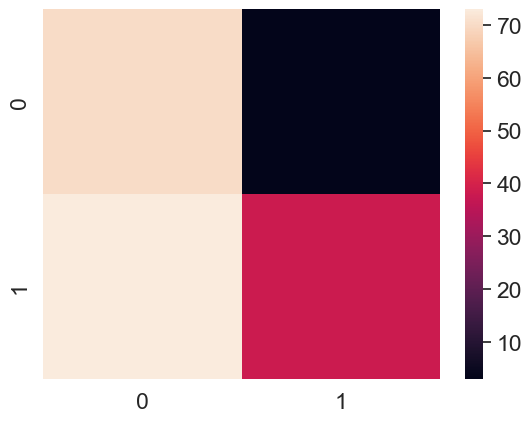

In [39]:
import seaborn as sns

sns.set(font_scale = 1.5)

conf_mat = confusion_matrix(y_test , y_pred1)

sns.heatmap(conf_mat)

<Axes: >

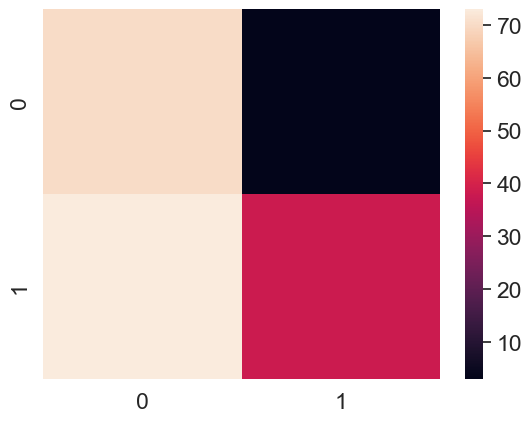

In [40]:
import seaborn as sns

sns.set(font_scale = 1.5)

conf_mat2 = confusion_matrix(y_test , y_pred2)

sns.heatmap(conf_mat)

In [41]:
conf_mat , conf_mat2

(array([[70,  3],
        [73, 38]]),
 array([[61, 12],
        [16, 95]]))

In [42]:
print(classification_report(y_test , y_pred1))

              precision    recall  f1-score   support

           0       0.49      0.96      0.65        73
           1       0.93      0.34      0.50       111

    accuracy                           0.59       184
   macro avg       0.71      0.65      0.57       184
weighted avg       0.75      0.59      0.56       184



In [43]:
print(classification_report(y_test , y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        73
           1       0.89      0.86      0.87       111

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



In [44]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000
